<a href="https://colab.research.google.com/github/klkeroro/Metaheuristic-GA/blob/main/GA_BinaryGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Min objective function value: 9.674840839579701e-08
Optimal solution [0.001544952392578125, 0.00156402587890625]


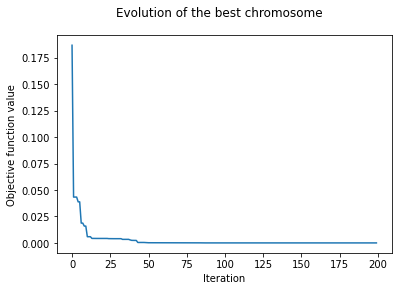

In [8]:
from numpy.random import rand, randint
import numpy as np
import matplotlib.pyplot as plt
 
 
def objective_function(I):
    x = I[0]
    y = I[1]
    Objective_min = 0.26*(x**2 + y**2) - 0.48*x*y
    Objective_max = 1/(1 + Objective_min) # Convert the min to max problem
     
    return Objective_max
 
 
# Parameters of the binary genetic algorithm
bounds = [[-10, 10], [-10, 10]]
iteration = 200
bits = 20 # number of bits for each variable
pop_size = 100
crossover_rate = 0.8
mutation_rate = 0.2
 
 
#-----------------------------------------------------------------------------
# the rest of the python code can be kept the same
def crossover(pop, crossover_rate):
    offspring = list()
    for i in range(int(len(pop)/2)):
        p1 = pop[2*i-1].copy() # parent 1
        p2 = pop[2*i].copy() # parent 2   
        if rand() < crossover_rate:
            cp = randint(1, len(p1)-1,size=2) # two random cutting points
            while cp[0]==cp[1]:
                cp = randint(1, len(p1)-1,size=2) # two random cutting points
                 
            cp = sorted(cp)
            c1 = p1[:cp[0]] + p2[cp[0]:cp[1]] + p1[cp[1]:]
            c2 = p2[:cp[0]] + p1[cp[0]:cp[1]] + p2[cp[1]:]
            offspring.append(c1)
            offspring.append(c2)
        else:
            offspring.append(p1)
            offspring.append(p2)
     
    return offspring
 
 
def mutation(pop, mutation_rate):
    offspring = list()
    for i in range(int(len(pop))):
        p1 = pop[i].copy() # parent 
        if rand() < mutation_rate:
            cp = randint(0, len(p1)) # random gene
            c1 = p1
            if c1[cp]==1:
                c1[cp]=0 # flip
            else:
                c1[cp]=1
 
            offspring.append(c1)
        else:
            offspring.append(p1)
     
    return offspring
 
 
# roulette wheel selection
def selection(pop, fitness, pop_size):
    next_generation = list()
    elite = np.argmax(fitness)
    next_generation.append(pop[elite])  # keep the best
    P = [f/sum(fitness) for f in fitness]  # selection probability
    index = list(range(int(len(pop))))
    index_selected = np.random.choice(index, size=pop_size-1, replace=False, p=P)
    s = 0
    for j in range(pop_size-1):
        next_generation.append(pop[index_selected[s]])
        s +=1
 
    return next_generation
 
 
def decoding(bounds, bits, chromosome):
    real_chromosome = list()
    for i in range(len(bounds)):
        st, en = i * bits, (i*bits)+bits # extract the chromosome
        sub = chromosome[st:en]
        chars = ''.join([str(s) for s in sub]) # convert to chars
        integer = int(chars, 2) # convert to integer
        real_value = bounds[i][0] + (integer/(2**bits)) * (bounds[i][1] - bounds[i][0])
        real_chromosome.append(real_value)
 
    return real_chromosome
 
 
# Initial population
pop = [randint(0, 2, bits*len(bounds)).tolist() for _ in range(pop_size)]
 
 
# main program
best_fitness = []
for gen in range(iteration):
    offspring = crossover(pop, crossover_rate)
    offspring = mutation(offspring, mutation_rate)
     
    for s in offspring:
        pop.append(s)
 
    real_chromosome = [decoding(bounds, bits, p) for p in pop]
    fitness = [objective_function(d) for d in real_chromosome] # fitness value
 
    index = np.argmax(fitness)
    current_best = pop[index]
    best_fitness.append(1/max(fitness) - 1)
    pop = selection(pop,fitness,pop_size)
     
fig = plt.figure()
plt.plot(best_fitness)
fig.suptitle('Evolution of the best chromosome')
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
print('Min objective function value:',min(best_fitness))
print("Optimal solution",decoding(bounds, bits, current_best))